$\textbf{PROGRAMMING ASSIGNMENT}$

##### Submitted by Maria Eloisa H. Garcia
---

#### Data: https://archive.ics.uci.edu

#### Instructions: Choose a dataset of your liking and perform the following:

#### 1. Create a Correlation Plot

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Toxicity-13F.csv", sep=',', header=0)

# Exclude the last column (categorical)
df = df.iloc[:, :-1]
df

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
0,60.1757,-0.0231,-0.6667,-167.1241,0.0000,3.4009,2.3109,4,1.0229,1.0575,3.5545,-15.5940,4.1692
1,44.5031,-0.1236,-16.5096,-16.2080,172.2000,3.3611,2.1117,2,1.7155,1.7013,3.6066,-14.3317,2.0821
2,37.5488,0.0662,19.3467,-159.1796,173.4028,3.2705,2.0198,8,0.6992,0.7828,3.6441,-25.4493,2.8730
3,40.5929,0.0714,-9.5672,-21.4416,177.2726,3.2748,2.0191,6,0.9951,1.0298,3.6564,-19.6376,3.0444
4,52.7343,-0.0861,-11.8892,-2.0780,171.1315,3.4094,2.1664,2,0.7363,0.7427,3.5216,-8.2157,2.9469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.6305,-0.1231,-3.1521,-2.9706,71.9807,2.4269,2.0708,1,1.0932,0.7954,2.8103,-4.3924,0.7136
167,33.1806,-0.0486,-7.2825,-4.0095,125.0777,3.0040,2.0701,3,1.0687,0.9850,3.2560,-4.4435,1.6616
168,28.3570,-0.0726,8.0017,-3.2338,133.7697,3.2468,1.9242,2,1.3249,0.9103,3.2822,-5.5907,1.9339
169,26.4286,0.0420,-32.5992,-7.0649,144.0674,3.2089,1.9162,4,1.3001,1.2687,3.2904,-3.5370,2.0526


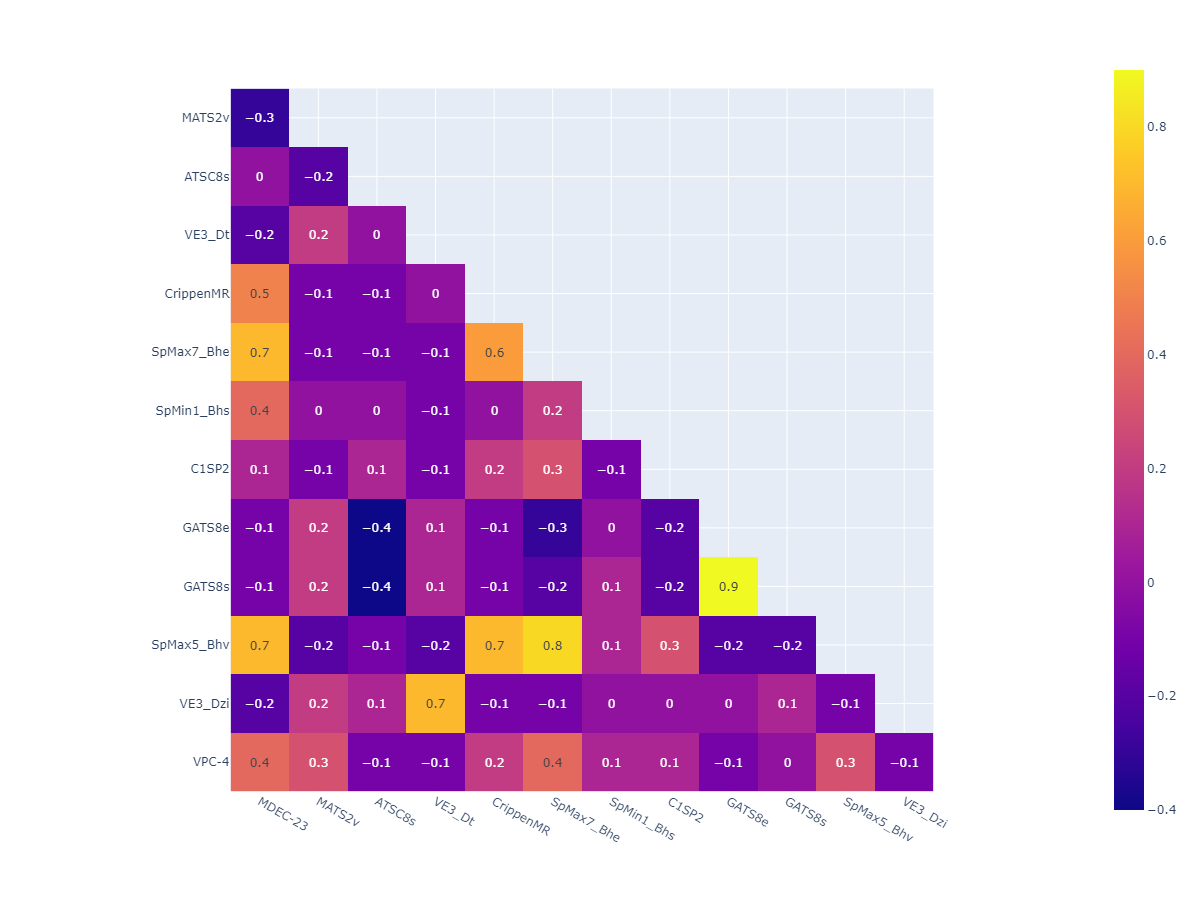

In [7]:
import plotly.express as px
import numpy as np

# Correlation
df_corr = df.corr().round(1)  

# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all', axis=0).dropna(axis=1, how='all')
fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height = 900, width=900)
fig.show()

#### 2. Check the distribution of each column and determine which probability distribution it fits.

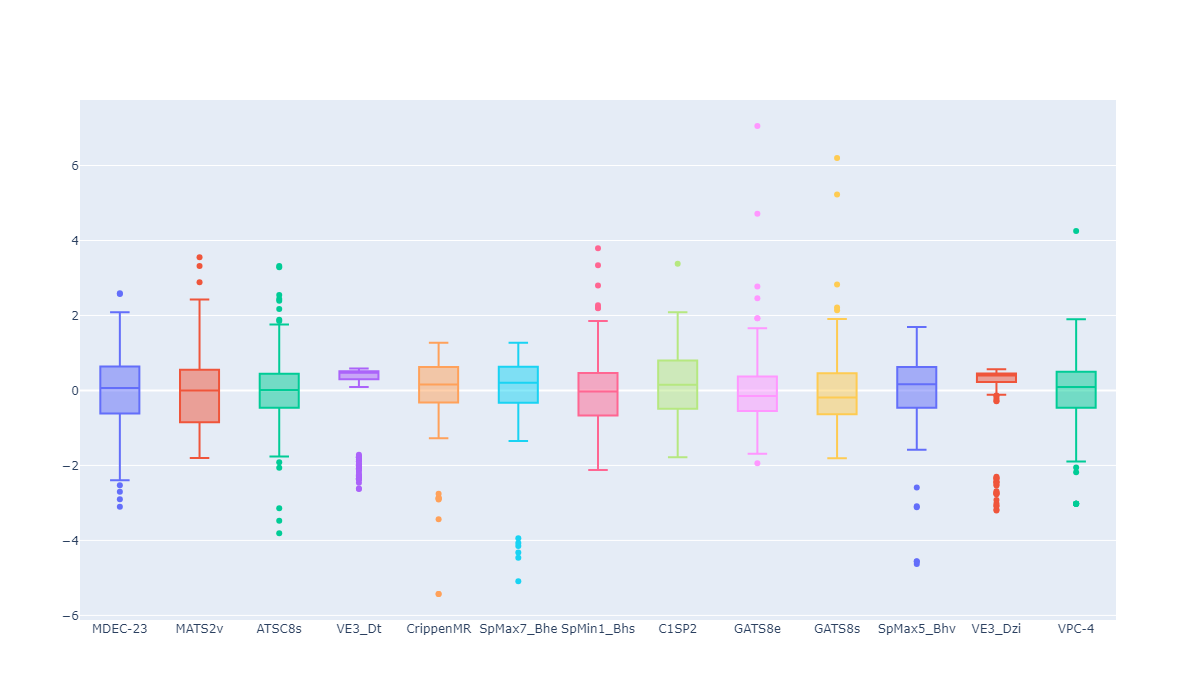

In [8]:
import plotly.graph_objects as go

standard = (df-df.mean())/df.std()

# Create a box plot
fig = go.Figure()
for i in standard.columns:
    fig.add_trace(go.Box(y=standard[str(i)], name=str(i)))
fig.update_layout(showlegend=False,height = 700, width=800)
fig.show()

#### Observation
The box plot displays the data distribution characteristics of a __Gaussian (normal) distribution__. A bell-shaped curve is suggested by symmetrical distribution around the median and evenly split quartile boxes. Whiskers equidistant above and below the quartiles suggest normalcy. However, several outliers, especially on the lower whisker, merit caution. Outliers can exist in normal distributions, but their prevalence may test the Gaussian assumption. However, the data's symmetry and central tendency reflect a normal distribution, demonstrating a close resemblance.

#### 3. Create a summary statistics.

In [9]:
summary = df.describe(include = 'all')
summary

,MDEC-23,MATS2v,ATSC8s,VE3_Dt,CrippenMR,SpMax7_Bhe,SpMin1_Bhs,C1SP2,GATS8e,GATS8s,SpMax5_Bhv,VE3_Dzi,VPC-4
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,39.135014,-0.005382,-6.269639,-32.311274,146.236654,3.220797,2.041885,2.760234,1.090043,1.131815,3.425033,-23.920250,2.568535
std,10.086143,0.081755,30.055317,51.493985,26.937485,0.191441,0.080524,1.551412,0.455048,0.498616,0.199008,42.218482,0.849953
min,7.861200,-0.152700,-120.803600,-167.741600,0.000000,2.247100,1.870900,0.000000,0.207600,0.231900,2.503400,-159.179600,0.000000
25%,32.911850,-0.074050,-19.902350,-16.831150,137.735350,3.157700,1.988400,2.000000,0.840100,0.817600,3.334050,-14.401850,2.183700
50%,39.828400,-0.005500,-5.951200,-8.148000,150.502700,3.260100,2.039900,3.000000,1.022700,1.039100,3.457500,-7.053600,2.647200
75%,45.469500,0.039500,6.988850,-5.928400,162.921750,3.339450,2.078700,4.000000,1.258300,1.357500,3.549150,-4.702950,2.991850
max,65.256000,0.284900,93.508200,-2.067100,180.556500,3.464200,2.347500,8.000000,4.299900,4.223000,3.761600,0.000000,6.185400


#### 4. Perform a hypothesis test (Code from scratch).

#### Defining the Null and Alternative Hypothesis:<br>
The null hypothesis (Ho) is that the mean of MDEC-23 for Group 1 is equal to the mean of MDEC-23 for Group 2. The alternative hypothesis (Ha) is that the mean of MDEC-23 for Group 1 is not equal to the mean of MDEC-23 for Group 2.<br>

- Ho: μ1 = μ2
- Ha: μ1 ≠ μ2

A significance level of α = 0.05 will be used.<br><br>
#### Performing the Unpaired Two-Sample t-test:

In [10]:
# Defining custom functions since numpy should not be used (code from scratch)
def cust_sqrt(x):
    return x**0.5

def cust_linspace(start, stop, num):
    delta = (stop-start)/(num - 1)
    return [start + i*delta for i in range(num)]

def cust_exp(x):
    return 2.71828**x

def cust_sum(arr):
    total = 0
    for val in arr:
        total += val
    return total

def cust_zeros_like(arr):
    return [0]*len(arr)

def cust_abs(x):
    if x >= 0:
        return x
    else:
        return -x

def cust_argmin(arr):
    min_val = arr[0]
    min_idx = 0
    for i in range(1, len(arr)):
        if arr[i] < min_val:
            min_val = arr[i]
            min_idx = i
    return min_idx

# Define groups
grp1 = df['MDEC-23'][:85]
grp2 = df['MDEC-23'][85:]

# Mean & variance
mean1 = cust_sum(grp1) / len(grp1)
mean2 = cust_sum(grp2) / len(grp2)
var1 = cust_sum((x - mean1)**2 for x in grp1) / (len(grp1)-1)
var2 = cust_sum((x - mean2)**2 for x in grp2) / (len(grp2)-1)

# Pooled standard deviation & t-statistic
pooled_std = cust_sqrt((var1+var2) / (len(grp1)+len(grp2)-2))
t_stat = (mean1-mean2) / (pooled_std*cust_sqrt(1/len(grp1)+1/len(grp2)))

df = len(grp1)+len(grp2)-2
alpha = 0.05
crit_value = 2.048

# Approximate CDF of t-distribution
def t_cdf(t, df, n=1000):
    x = cust_linspace(-10, 10, n)
    delta = x[1]-x[0]
    y = [(1 / cust_sqrt(2*3.14159)) * cust_exp(-i**2 / 2) for i in x]
    cdf = [0]*len(x)
    cdf[0] = 0.5 * y[0] * delta
    for i in range(1, len(x)):
        cdf[i] = cdf[i-1] + 0.5 * (y[i-1]+y[i]) * delta
    return cdf[cust_argmin([cust_abs(val-t) for val in x])]

# p-value
if t_stat >= 0:
    p_value = 2*(1-t_cdf(t_stat, df))
else:
    p_value = 2*t_cdf(t_stat, df)

print("t-statistic:", t_stat)
print("Critical value:", crit_value)
print("p-value:", max(0.0, p_value))

# Reject or fail to reject null hypothesis
if cust_abs(t_stat) > crit_value:
    print("Reject Ho")
else:
    print("Fail to reject Ho")

t-statistic: 36.5851761726813
Critical value: 2.048
p-value: 0.0
Reject Ho


#### Interpreting the Results:<br>
The null hypothesis can be rejected because the estimated t-statistic, 36.5852, is substantially bigger than the crucial value, 2.048. The p-value is 0.0 as well, which is the smallest possible value. There is considerable evidence that Group 1 and Group 2 means are statistically different.